In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import healpy as hp
import os
import sys
sys.path.insert(0, '/home/aew492/lss-dipoles')
import tools
from Secrest_dipole import SecrestDipole

#### load the maps generated in `SecrestDipole` and compute the dipole

### $|b| > 30^\circ$

In [3]:
d30 = SecrestDipole(blim=30, w1lim=16.4)

loading initial catalog, catwise_agns_master.fits
3136211 sources in initial catalog.


In [4]:
map_d30 = d30.load_hpxelatcorr()

In [5]:
map_d30

hpidx,ra,dec,l,b,elon,elat,density,primrad,secrad,pa,denscorr
,deg,deg,deg,deg,deg,deg,,deg,deg,deg,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
71,172.49999999999997,85.61313403601544,124.7153356176665,31.229726800190264,100.5860674548607,65.619304098904,52.425036518571005,0.0,0.0,0.0,55.69099570419057
72,187.50000000000003,85.61313403601544,123.41200448366939,31.495118601911656,101.07451473198431,66.74628467105045,84.59494529133049,0.0,0.0,0.0,87.91699578425909
73,202.5,85.61313403601544,122.0715702620171,31.450527734572855,100.81992542175065,67.8861689770251,66.72277375090856,0.0,0.0,0.0,70.10155778697303
74,217.5,85.61313403601544,120.79752858198957,31.099420223419816,99.73026797124335,68.95783853313554,69.10572995629815,0.0,0.0,0.0,72.53785239755894
96,160.71428571428572,84.88153790222776,126.12083354888998,31.425812981979252,101.25312022530063,64.43584804086758,65.53129564821376,0.0,0.0,0.0,68.73835266721333
97,173.57142857142858,84.88153790222776,124.92214628200401,31.945290742247145,102.33675137056156,65.48465707909372,48.85060221048662,0.0,0.0,0.0,52.109859836600116
98,186.42857142857142,84.88153790222776,123.60863284338168,32.21287439965959,102.90188133579016,66.60610379707708,64.33981754551897,0.0,0.0,0.0,67.65489105173171
99,199.28571428571428,84.88153790222776,122.25570668206038,32.2129234700419,102.84993897653374,67.75059357761843,67.91425185360335,0.0,0.0,0.0,71.28628812348656


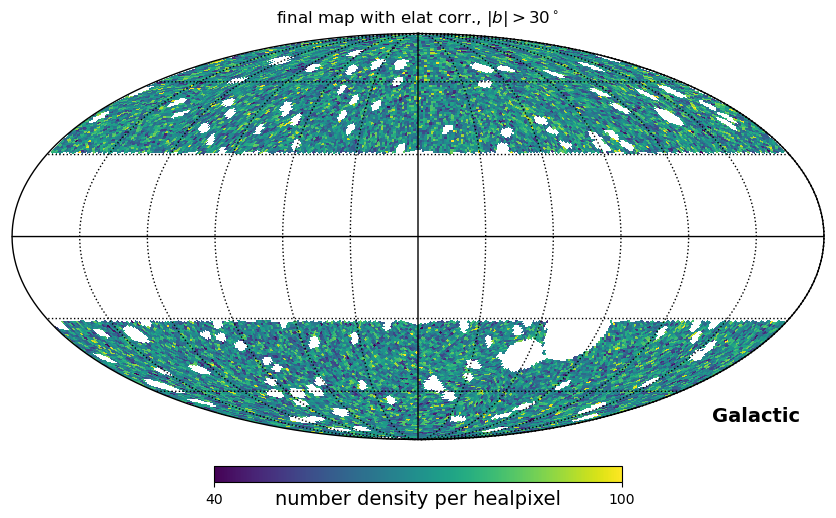

In [6]:
d30.plot_map(map_d30, title='final map with elat corr., $|b|>30^\circ$', min=40, max=100)

In [7]:
amp_d30, dir_d30 = d30.compute_dipole(map_d30)

amp = 0.014749
direction:  <SkyCoord (Galactic): (l, b) in deg
    (239.89586344, 28.75049819)>


### $|b| > 35^\circ$

In [8]:
d35 = SecrestDipole(blim=35, w1lim=16.4, load_init=False)

In [9]:
map_d35 = d35.load_hpxelatcorr()

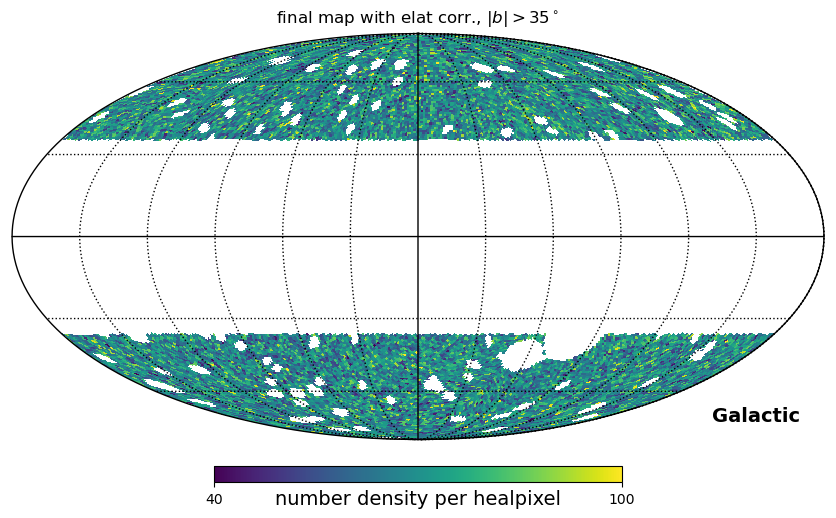

In [10]:
d35.plot_map(map_d35, title='final map with elat corr., $|b|>35^\circ$', min=40, max=100)

In [11]:
amp_d35, dir_d35 = d35.compute_dipole(map_d35)

amp = 0.014531
direction:  <SkyCoord (Galactic): (l, b) in deg
    (240.15825369, 27.27421355)>


### $|b| > 25^\circ$

In [12]:
d25 = SecrestDipole(blim=25, w1lim=16.4, load_init=False)
map_d25 = d25.load_hpxelatcorr()

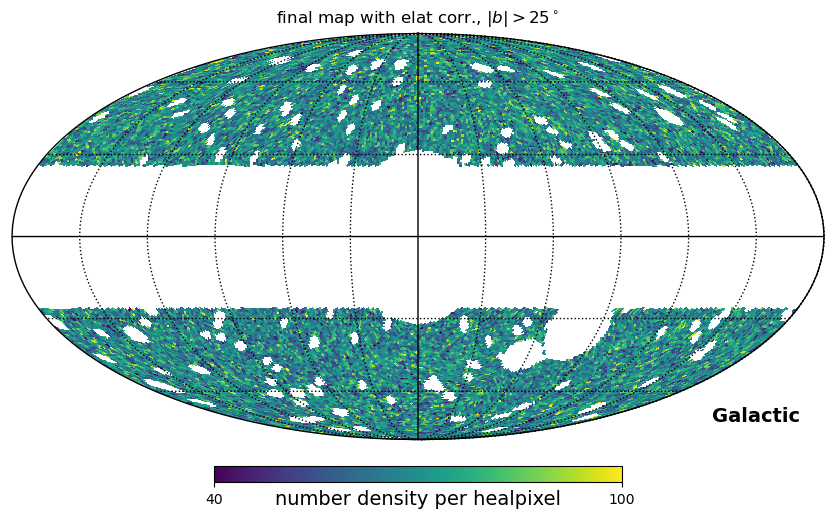

In [13]:
d25.plot_map(map_d25, title='final map with elat corr., $|b|>25^\circ$', min=40, max=100)

In [14]:
amp_d25, dir_d25 = d25.compute_dipole(map_d25)

amp = 0.014480
direction:  <SkyCoord (Galactic): (l, b) in deg
    (230.32413176, 29.62687741)>


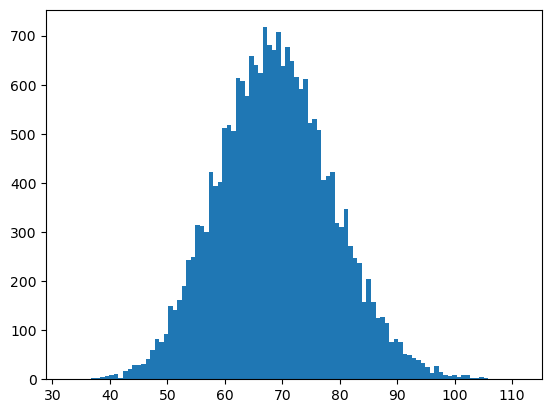

In [39]:
fig, ax = plt.subplots()

_, _, _ = ax.hist(map_d30['denscorr'], bins=100)

### compare dipoles

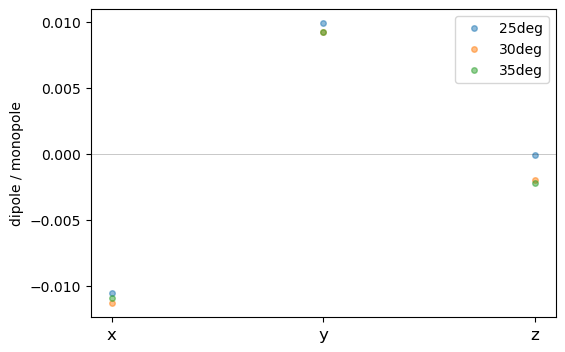

In [33]:
fig, ax = plt.subplots(figsize=(6,4))
kwargs = dict(marker='.', ms=8, ls='None', alpha=0.5)
ax.plot(d25.amps[1:]/d25.amps[0], label='25deg', **kwargs)
ax.plot(d30.amps[1:]/d30.amps[0], label='30deg', **kwargs)
ax.plot(d35.amps[1:]/d35.amps[0], label='35deg', **kwargs)
ax.axhline(0, color='k', alpha=0.3, lw=0.5)
ax.set_ylabel('dipole / monopole')
ax.set_xticks(range(3))
ax.set_xticklabels(['x', 'y', 'z'], fontsize=12)
ax.legend()